<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/ADVFNMercfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As bibliotecas utilizadas para visualizar os dados serão:
Matplotlib: é uma biblioteca utilizada para plotar os mais variados tipos de gráficos.
Seaborn: utiliza o Matplotlib como base e fornece funções simples de usar para criação de gráficos que seriam complexos apenas com o Matplotlib.

Instalação:

In [1]:
pip install numpy pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mercado financeiro**

Podemos facilmente plotar gráficos de ações de empresas na bolsa de valores.

Vamos utilizar a biblioteca pandas-datareader para pegar informações sobre ações e preencher nosso dataset. Essa biblioteca não pega dados da Bovespa.

Vamos instalá-la:

In [2]:
pip install numpy pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



In [6]:
import pandas_datareader.data as pdr
from datetime import datetime, timedelta



fonte  = 'https://raw.githubusercontent.com/pcpiscator/Ciencia-de-dados/master/Acaohist.txt'
df=pd.read_csv(fonte)
df

,data,abre,fecho,hmin,min,hmax,max
0,02/ago/22,33.77,33.79,00:00,33.48,00:00,34.50
1,03/ago/22,34.01,33.80,00:00,33.56,00:00,34.16
2,04/ago/22,34.08,34.33,00:00,33.58,00:00,34.40
3,05/ago/22,34.15,34.90,00:00,34.12,00:00,35.06
4,08/ago/22,35.14,36.77,00:00,35.13,00:00,36.79
5,09/ago/22,37.01,37.46,00:00,36.85,00:00,37.47
6,10/ago/22,37.65,37.10,00:00,36.61,00:00,37.65
7,11/ago/22,37.45,36.29,00:00,36.18,00:00,37.86
8,12/ago/22,29.10,31.67,10:10,29.08,16:38,31.83


In [7]:
df.head()

,data,abre,fecho,hmin,min,hmax,max
0,02/ago/22,33.77,33.79,00:00,33.48,00:00,34.50
1,03/ago/22,34.01,33.80,00:00,33.56,00:00,34.16
2,04/ago/22,34.08,34.33,00:00,33.58,00:00,34.40
3,05/ago/22,34.15,34.90,00:00,34.12,00:00,35.06
4,08/ago/22,35.14,36.77,00:00,35.13,00:00,36.79


In [8]:
import pandas_datareader.data as pdr
from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

df.tail()

,data,abre,fecho,hmin,min,hmax,max
4,08/ago/22,35.14,36.77,00:00,35.13,00:00,36.79
5,09/ago/22,37.01,37.46,00:00,36.85,00:00,37.47
6,10/ago/22,37.65,37.10,00:00,36.61,00:00,37.65
7,11/ago/22,37.45,36.29,00:00,36.18,00:00,37.86
8,12/ago/22,29.10,31.67,10:10,29.08,16:38,31.83


In [14]:
df[['min','max']].plot(figsize=(15, 4), title='Ações Petrobras-PETR4', grid=True)

KeyError: ignored

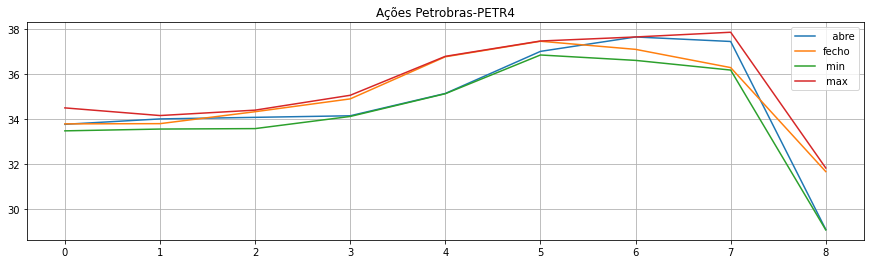

In [15]:
df.plot(figsize=(15, 4), title='Ações Petrobras-PETR4', grid=True)

In [19]:
df['MovingMean14'] = df.fecho.rolling(9).mean()  # Média movel de 14 dias do Fechamento
#df['MovingMean30'] = df.Fechamento.rolling(30).mean()  # Média movel de 30 dias do Fechamento
df['DailyReturn'] = df.fecho.pct_change()              # Retorno diario percentual
df.tail()

,data,abre,fecho,hmin,min,hmax,max,MovingMean14,DailyReturn
4,08/ago/22,35.14,36.77,00:00,35.13,00:00,36.79,NaN,0.053582
5,09/ago/22,37.01,37.46,00:00,36.85,00:00,37.47,NaN,0.018765
6,10/ago/22,37.65,37.10,00:00,36.61,00:00,37.65,NaN,-0.009610
7,11/ago/22,37.45,36.29,00:00,36.18,00:00,37.86,NaN,-0.021833
8,12/ago/22,29.10,31.67,10:10,29.08,16:38,31.83,35.123333,-0.127308


In [23]:
columns = ['fecho','MovingMean9'] #'MovingMean30'
graph = df[columns].plot(figsize=(15, 4), grid=True)

KeyError: ignored

In [24]:
#NÃO FUNCIONOU!
graph.figure.savefig('graph.png')

NameError: ignored

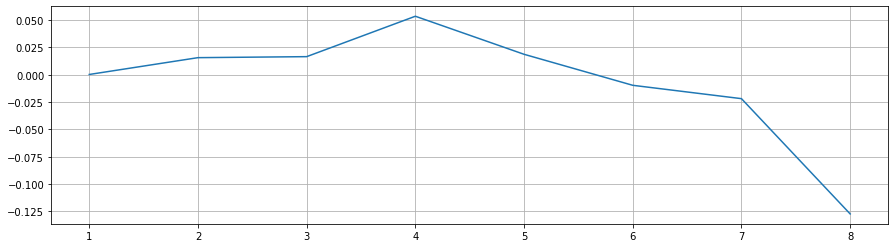

In [25]:
df.DailyReturn.plot(figsize=(15, 4), grid=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


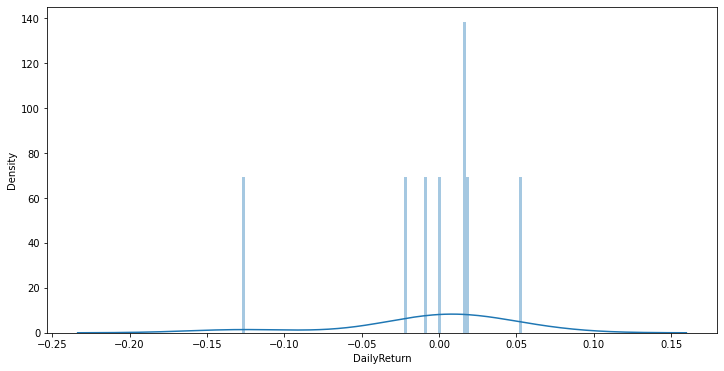

In [26]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(df.DailyReturn.dropna(), bins=100, ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

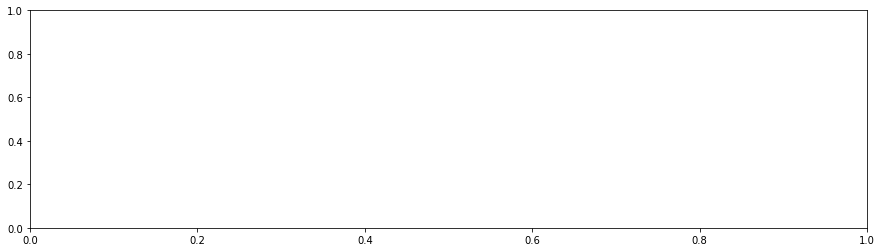

In [27]:

df.index = pd.to_datetime(df.index)
month_index = df.index.to_period('M')
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
df['Month'] = df.index.to_period('M')
sns.boxplot('Month', '#'MovingMean30'', data=df, ax=ax1)


In [28]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 2.6 MB/s 


In [29]:
#NÃO FUNCIONOU!
import matplotlib.dates as mdates

df.reset_index(inplace=True)


In [30]:
#NÃO FUNCIONOU!

def plot_candle_stick(df):
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
 
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    
columns = ['Data','Maxima', 'Minima', 'Fechamento']
plot_candle_stick(df[columns].tail(15))


KeyError: ignored

In [31]:
#NÃO FUNCIONOU!
lm = sns.lmplot('DateAsNumber', 'Fechamento', data=df, aspect=1.7, order=3)
lm.ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
lm.ax.set_xlabel('Data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyError: ignored

In [32]:
lm.fig.savefig('graph3.png')

NameError: ignored